# Vorbereiten der Daten mit RKit

RDKit muss installiert sein.
Vorzugsweise in einem virt. Env. (z.B. my-rdkit-env). Der Prompt zeigt sich dann so:    
`(my-rdkit-env) andreas@hugh:~/Documents/Vorlesung/.../Work $`

Derselbe Workflow muss für die Trainigsdaten und Testdaten durchgeführt werden (hier nur Test, weil dieser kleiner ist):

+ Laden der Rohdaten
+ Beide Daten enthalten einen Datensatz pro Zeile.
+ Extraktion der Spalten mit SMILES und Wirkung
+ Speichern der Wirkung (als log10) in eigener Datei (das wird später y_train bzw. y_test).
+ Berechnen der 2D-Struktur aus den Smiles mit DRkit
+ Berechnen von Deskriptoren mit RDkit
+ Speichern der Deskriptoren in eigener Datei (das wird später x_train bzw. x_test).


## Lesen

mit intelligent:
+ erste Zeile wird übersprungen
+ Zeilen mit Ki = 0 werden übersprungen

In [4]:
import csv
import numpy as np
import math

print(csv.list_dialects())
csvFile =  'TryptaseDataset/train.csv'
mol = []
with open(csvFile, 'r') as inFile: 
    molReader = csv.reader(inFile, dialect = 'excel-tab')
    
    next(molReader)
    mols = [line for line in molReader if line[2] != '0']
    

mol = mols[0]
len(mols)

['excel', 'excel-tab', 'unix']


3610

In [2]:
mol

['3894',
 'C[C@H]1ON=C([C@@H]1C(=O)Nc2ccc(cc2)c3ccccc3S(=O)(=O)N)c4cccc(c4)C(=N)N',
 '4500']

# Alle y-Werte als pKi in einer Datei speichern

mit intelligent:
+ alle Werte auf Molar umrechnen
+ neg. Log, damit es klare Unterschiede gibt (pKi = -logKi)

In [7]:
Ki_nM = [float(x[2]) for x in mols]
Ki = [x*0.000000001 for x in Ki_nM]
pKi = [-math.log10(x) for x in Ki]

print(Ki_nM[1:5])
print(Ki[1:5])
print(pKi[1:5])


[3000.0, 300000.0, 1900.0, 20000.0]
[3.3333333333333334e-13, 3.3333333333333336e-15, 5.263157894736843e-13, 5e-14]
[12.477121254719663, 14.477121254719663, 12.278753600952829, 13.301029995663981]


# RDKit testen

### Smiles erkennen:

In [4]:
from rdkit import Chem
mol = Chem.MolFromSmiles(mols[500][1])

print(mol)

### Berechnen der 2D-Struktur:

Compute2DCoords() verändert das mol-Objekt direkt - deshalb besser in der objektorientierten Schreibweise verwenden (sonst ist das ein unschöner Seiteneffekt):

In [5]:
from rdkit.Chem import AllChem

# nicht so schön:
# m = AllChem.Compute2DCoords(smi)
mol.Compute2DCoords()

print(Chem.MolToMolBlock(mol))


     RDKit          2D

 27 29  0  0  0  0  0  0  0  0999 V2000
    5.6935   -4.9920    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    5.3114   -3.5415    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8641   -3.1472    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4820   -1.6967    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5471   -0.6405    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9944   -1.0348    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3765   -2.4853    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1650    0.8100    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    5.6155    1.1922    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7145    0.4279    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7828    2.2605    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.3356    2.6548    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9534    4.1053    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5062    4.4996    0

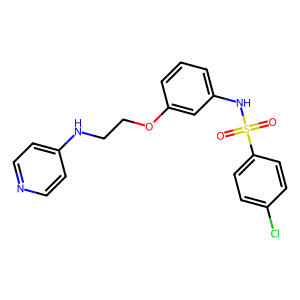

In [6]:
from rdkit.Chem import Draw
Draw.MolToImage(mol)

# geht auch:
# Draw.MolToFile(mol,'mol500.png')

### Eigenschaften und Fingerprints:

In [7]:
from rdkit.Chem import Descriptors

print( Descriptors.PEOE_VSA1(mol)) # ... alle bis PEOE_VSA14()
print( Descriptors.Chi0(mol), Descriptors.Kappa1(mol))

print( Descriptors.TPSA(mol), Descriptors.MolLogP(mol))

10.05365155780638
19.114673407305983 19.004447688408163
80.32000000000001 4.026700000000002


In [8]:
from rdkit.Chem import MACCSkeys

fps = MACCSkeys.GenMACCSKeys(mol)
print(fps)

maccs = list(fps)
print(maccs, len(maccs))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] 167


# Den Datensatz mit RDKit bearbeiten

+ Schön: alle benötigten Eigenschaften aus einer Funktion
+ Anwenden **ohne** Loop
+ speichern in der Datei, mit der später das neuronale Netz trainiert werden soll

In [9]:
def mkDescriptors(m):
    
    m.Compute2DCoords()
    fps = MACCSkeys.GenMACCSKeys(m)
    maccs = list(fps)
    desc = maccs
    desc.append(Descriptors.PEOE_VSA1(m))
    desc.append(Descriptors.PEOE_VSA2(m))
    # ... natürlich alle PEOEs
    # ... und Chi0, Kappa1, MolLogP
    
    return desc
    
print( mkDescriptors(mol))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 10.05365155780638, 9.706073385399296]


In [10]:
allMols = [Chem.MolFromSmiles(smi[1]) for smi in mols]
allDesc = [... for mol in allMols]

In [11]:
with open('x_test.dat', 'w') as outFile:
    ...

In [12]:
print(allDesc[100:101])

[Ellipsis]


# CombiLib

In [13]:
combiLib = Chem.SDMolSupplier('c1lib.sdf')

OSError: File error: Bad input file c1lib.sdf

In [ ]:
Draw.MolToImage(...)

In [ ]:
allDesc = [... for mol in combiLib]
print(allDesc[100:101])
len(allDesc)

In [ ]:
with open('x_combi.dat', 'w') as outFile:
    ...